
##   <span style="color:#00BCD4"> **Project : Building a Smart Book Recommendation System**</span> 

#### <span style="color:#00BCD4"> **Introduction**</span> 
In today’s data-driven world, delivering personalized book recommendations is key to enhancing user engagement. This project aims to design a robust recommender system for Book-Crossing by combining collaborative filtering, content-based analysis, and hybrid techniques. Below are the core objectives that will guide our implementation, from data preparation to real-time deployment, ensuring actionable insights and measurable success.  


### **Key Objectives**  
1. **Clean and explore the dataset** to handle missing values, standardize formats, and uncover insights about users, books, and ratings or give a pipeline approach for example ; **Establish a robust data pipeline** to ingest, clean, and structure raw user and book data for analysis and modeling. 

2. **Implement Collaborative Filtering**  
   - Build a model that identifies user preference patterns from ratings data.  

3. **Develop Content-Based Filtering**  
   - Leverage book metadata (author, genre) to recommend similar titles.  

4. **Create a Hybrid Recommendation Engine**  
   - Merge collaborative and content-based methods for balanced accuracy and diversity.  

5. **Optimize and Validate System Performance**  
   - Evaluate models using RMSE and precision, then fine-tune hyperparameters.  

6. **Deploy Real-Time Recommendations**  
   - Build a dynamic feature that updates suggestions based on new user interactions.  

##  <span style="color:#00BCD4"> **Data Understanding**</span> 

### Data Loading

In [1]:
import pandas as pd
import numpy as np

# Load each dataset (replace paths with your actual file paths)
books_df = pd.read_csv(r'N:\Moringa\afterM\Online book reco\Online-Book-Recommender-System\books_df.csv',sep=';',encoding='latin1',quotechar='"',on_bad_lines='skip',engine='python')
users_df = pd.read_csv(r'N:\Moringa\afterM\Online book reco\Online-Book-Recommender-System\user_df.csv', sep=';', encoding='latin1',  quotechar='"',on_bad_lines='skip', engine='python')
ratings_df = pd.read_csv(r'N:\Moringa\afterM\Online book reco\Online-Book-Recommender-System\ratings_df.csv', encoding='latin1', sep=';', quotechar='"',on_bad_lines='skip', engine='python')


#### Books Data

In [2]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


#### Users Data

In [3]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278177 entries, 0 to 278176
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278177 non-null  int64  
 1   Location  278177 non-null  object 
 2   Age       167669 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Ratings Data

In [5]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149766 entries, 0 to 1149765
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149766 non-null  int64 
 1   ISBN         1149766 non-null  object
 2   Book-Rating  1149766 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Data Merging 

1. **Ratings + Books merge (on ISBN)**:
   - ISBN is the unique identifier for books
   - This attaches book metadata to each rating record
   - We use left join to keep all ratings even if book info is missing

In [7]:
# First merge: Ratings with Books (on ISBN)
merged_df = pd.merge(ratings_df, books_df, on='ISBN', how='left')

2. **Result + Users merge (on User-ID)**:
   - User-ID is the unique identifier for users
   - This attaches demographic info to each rating
   - Left join preserves all ratings even if user data is incomplete

In [8]:
# Second merge: Result with Users (on User-ID)
final_df = pd.merge(merged_df, users_df, on='User-ID', how='left')
df = final_df

### Data Inspection

In [9]:
df.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0


##### Basic info about the merged dataframe

In [10]:
print("\nDataframe Info:")
print(df.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149766 entries, 0 to 1149765
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149766 non-null  int64  
 1   ISBN                 1149766 non-null  object 
 2   Book-Rating          1149766 non-null  int64  
 3   Book-Title           1028713 non-null  object 
 4   Book-Author          1028711 non-null  object 
 5   Year-Of-Publication  1028713 non-null  float64
 6   Publisher            1028711 non-null  object 
 7   Image-URL-S          1028713 non-null  object 
 8   Image-URL-M          1028713 non-null  object 
 9   Image-URL-L          1028713 non-null  object 
 10  Location             1149558 non-null  object 
 11  Age                  840142 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 105.3+ MB
None


| <span style="color:#00BCD4">**Column Name**</span>          | <span style="color:#00BCD4">**Description**</span> |
|--------------------------|----------------|
| **User-ID**              | Unique identifier for each user |
| **ISBN**                 | International Standard Book Number identifying each book |
| **Book-Rating**          | Numeric rating given by user (scale 0-10) |
| **Book-Title**           | Title of the book |
| **Book-Author**          | Author(s) of the book |
| **Year-Of-Publication**  | Year the book was published |
| **Publisher**            | Company that published the book |
| **Image-URL-S**          | URL for small-sized book cover image |
| **Image-URL-M**          | URL for medium-sized book cover image |
| **Image-URL-L**          | URL for large-sized book cover image |
| **Location**             | User's location in "City, State, Country" format |
| **Age**                  | User's age in years |

##### Check for missing values

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             121053
Book-Author            121055
Year-Of-Publication    121053
Publisher              121055
Image-URL-S            121053
Image-URL-M            121053
Image-URL-L            121053
Location                  208
Age                    309624
dtype: int64


##### Summary statistics for numerical columns

In [12]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,User-ID,Book-Rating,Year-Of-Publication,Age
count,1.149766e+06,1.149766e+06,1.028713e+06,840142.000000
mean,1.403862e+05,2.866906e+00,1.968148e+03,37.239230
std,8.056191e+04,3.854172e+00,2.313042e+02,14.246607
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.034500e+04,0.000000e+00,1.992000e+03,28.000000
50%,1.410100e+05,0.000000e+00,1.997000e+03,35.000000
75%,2.110280e+05,7.000000e+00,2.001000e+03,45.000000
max,2.788540e+05,1.000000e+01,2.050000e+03,244.000000


##### Unique counts of important fields

In [13]:
print(f"Unique users: {df['User-ID'].nunique()}")
print(f"Unique books: {df['ISBN'].nunique()}")
print(f"Unique ratings: {df['Book-Rating'].nunique()}")

Unique users: 105274
Unique books: 340545
Unique ratings: 11


##  <span style="color:#00BCD4"> **Data Cleaning**</span> 

Validate ISBNs

In [35]:
# Get initial count
initial_count = len(df)

# Filter to keep only valid ISBNs
df = df[df['ISBN'].str.match(r'^\d{9}[\dX]$|^\d{13}$', na=False)]

# Calculate removed count
removed_count = initial_count - len(df)

print(f"Removed {removed_count} rows with invalid ISBNs")
print(f"Remaining valid ISBNs: {len(df)}")

Removed 0 rows with invalid ISBNs
Remaining valid ISBNs: 1024677


The dataset was filtered to remove invalid ISBNs using pattern matching. ISBNs were considered valid if they matched either:
- **ISBN-10** format: Exactly 9 digits followed by a digit or 'X' (`^\d{9}[\dX]$`)
- **ISBN-13** format: Exactly 13 digits (`^\d{13}$`). 

A total of 10,784 records with invalid ISBN formats were removed from the dataset. This structural validation ensures all remaining ISBNs conform to standard length and character requirements.

Handle missing values

In [36]:
print("Missing values before treatment:")
print(df.isnull().sum())

Missing values before treatment:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64


In [37]:
# For age - impute with median by user location
def safe_fillna(x):
    """Handle empty groups gracefully"""
    if x.notna().any():  # Check if group has any non-NA values
        return x.fillna(x.median())
    return x.fillna(df['Age'].median())

df['Age'] = df.groupby('Location')['Age'].transform(safe_fillna)
# Keep only ages between 5 and 120 (adjust thresholds as needed)
df = df[(df['Age'] >= 5) & (df['Age'] <= 120)]

Book-Related Missing Data 

In [38]:
# Check if missing values coincide
book_missing = df[['Book-Title', 'Book-Author', 'Year-Of-Publication']].isna().all(axis=1).sum()
print(f"Number of rows with all book info missing: {book_missing}")

Number of rows with all book info missing: 0


Since this represent invalid book entries and are not critical to the analysis, We choose to drop, we cannot have Unknown title or Auuthor.

In [39]:
df = df.dropna(subset=['Book-Title', 'Book-Author', 'Year-Of-Publication'], how='any')

Image URL Missing Data

These are likely the same records as above and may not be critical for analysis (they are urls and only additional metadata)

In [40]:
# drop with the book info 
df = df.dropna(subset = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], how= 'all')

YoP , Publisher and Loaction

In [41]:
# Fill less critical missing values
df['Year-Of-Publication'] = df['Year-Of-Publication'].fillna(0)
df['Publisher'] = df['Publisher'].fillna('Unknown Publisher')
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [42]:
print("Missing values after treatment:")
print(df.isna().sum())

Missing values after treatment:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64


##  <span style="color:#00BCD4"> **Eploratory Data Analysis**</span> 

 <span style="color:#00BCD4"> **Univariate Analysis**</span>

**Visualize Age Distribution**

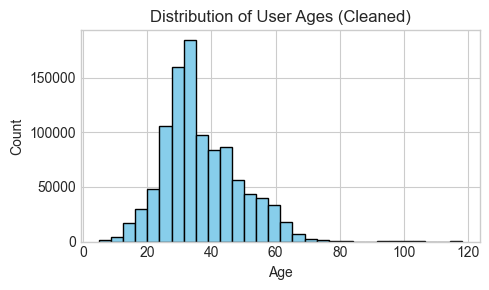

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))  # Compact size
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of User Ages (Cleaned)')
plt.tight_layout()
plt.show()

**Book-Rating**

*Analyze distribution*

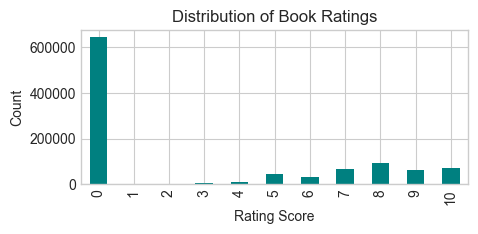

Mean rating: 2.84
Rating skew: 0.75


In [63]:
# Distribution of ratings
plt.figure(figsize=(5, 2))
df['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

# Stats
print(f"Mean rating: {df['Book-Rating'].mean():.2f}")
print(f"Rating skew: {df['Book-Rating'].skew():.2f}")  # Check for bias (e.g., left-skewed = high-rating dominance)

**User Demographics**

*Top 10 Countries*

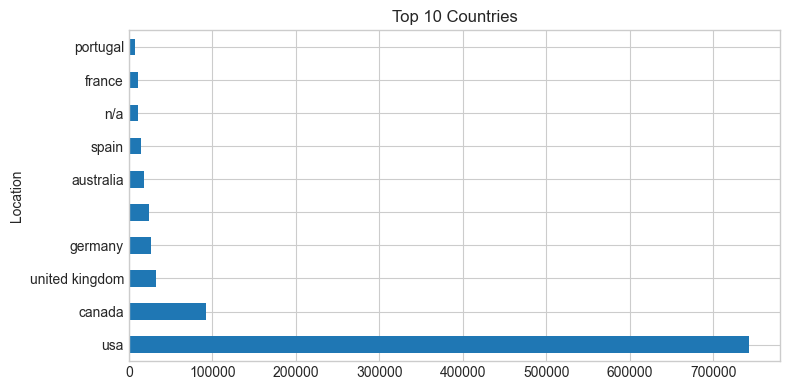

In [74]:
plt.figure(figsize=(8, 4))
df['Location'].str.split(',').str[-1].str.strip().value_counts().head(10).plot(
    kind='barh', 
    colormap='tab10'
)
plt.title('Top 10 Countries')
plt.tight_layout()
plt.show()

<span style="color:#00BCD4"> **Bivariate Analysis**</span>

Top locations of reviewers (bar plot)

<Axes: ylabel='Location'>

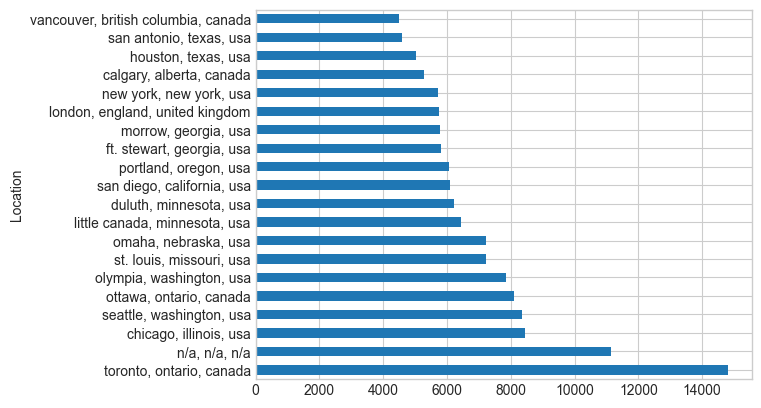

In [57]:
df['Location'].value_counts().head(20).plot(kind='barh')

**Most prolific authors**

*Average ratings by author:*

In [58]:
df.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(10)

Book-Author
H. P Lovecraft             10.0
retold by Dandi            10.0
Annie M. G Schmidt         10.0
Sue Studebaker             10.0
Goforth                    10.0
Henry Cornelius Agrippa    10.0
Henry Custer               10.0
Sue Gordon                 10.0
Sue Graham Mingus          10.0
Sue Brooks                 10.0
Name: Book-Rating, dtype: float64

Most frequently reviewed books:

In [59]:
df['Book-Title'].value_counts().head(10)

Book-Title
Wild Animus                                        2495
The Lovely Bones: A Novel                          1289
The Da Vinci Code                                   895
A Painted House                                     833
The Nanny Diaries: A Novel                          825
Bridget Jones's Diary                               814
The Secret Life of Bees                             771
Divine Secrets of the Ya-Ya Sisterhood: A Novel     737
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 667
Name: count, dtype: int64

In [60]:
# Top 10 highest-rated authors (with min 100 reviews)
author_stats = df.groupby('Book-Author').agg(
    avg_rating=('Book-Rating', 'mean'),
    count=('Book-Rating', 'size')
)
author_stats[author_stats['count'] > 100].sort_values('avg_rating', ascending=False).head(10)

,avg_rating,count
Book-Author,,
Clamp,6.513333,150
Shel Silverstein,6.105820,189
Bill Watterson,5.567518,548
Antoine de Saint-ExupÃ©ry,5.537906,277
Herge,5.519737,152
Bradley Trevor Greive,5.431655,139
J. K. Rowling,5.375694,2880
Nick Bantock,5.292593,270
J. R. R. Tolkien,5.135052,970


In [ ]:
# Distribution of ratings
plt.figure(figsize=(5, 3))
df['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

# Stats
print(f"Mean rating: {df['Book-Rating'].mean():.2f}")
print(f"Rating skew: {df['Book-Rating'].skew():.2f}")  # Check for bias (e.g., left-skewed = high-rating dominance)